# TSP problem using genetic algorithm

# هدف کلی
هدف این کد پایتون پیاده سازی یک راه حل برای مسئله فروشنده دوره گرد (TSP) با استفاده از یک الگوریتم ژنتیک است. TSP یک مسئله بهینه‌سازی کلاسیک است که در آن هدف یافتن کوتاه‌ترین مسیر ممکن است که هر یک از مجموعه‌ای از شهرها را دقیقاً یک بار بازدید می‌کند و سپس به شهر شروع باز می‌گردد.




## ابتدا کتابخانه هایی که نیاز داریم را ایمپورت میکنیم و ورودی را از کاربر میگیریم



In [162]:
import random
import numpy as np
import time
from math import sqrt

# حال توابع کلاس های مورد نظر را تعریف میکنیم


کلاس کلی مسإله همانند مسيله چند وزیر است. اما یک سری توابع در اینحا متناسب با نیاز های ما تغییر یافته اند.به طور مثال، کوروموزوم در این مسئله یک آرایه بهو طول تعداد شهر ها است که اعصای این ارایه بین ۰ تا تعداد شهرها می باشند و به این معناست که به ترتیب کداام شهر ها را طی میکنیم.  در این مسئله تابع ارزش بدین صورت تعریف میشود که روی کروموزوم یک حلقه میزنیم و فاصله عنصر i ام با i+1 را با یکدیگر جمع کرده و در نهایت برمیگردانیم. به عبارت دیگر تابع ارزش در این مسئله، مجموع فواصل اقلیدسی است.
همچنین دو تابع calc_distance، برای محاسبه مسیر بین دو شهر، و تابع calc_distance_matrix برای محاسبه فواصل تمام شهر ها در ابتدای کلاس تعریف شده اند.
همچنین از آنجا که نوع این سوال خارپشتی می باشد، باید پویش را درآن بیشتر کنیم هرچند نیاز نیست انتفاع را خیلی کاهش دهیم. اینکار را با افزایش جهش در تولید نسل بعدی انجام میدهیم. به طوری که یک متود جدید به تابع mutation به نام permutation اضافه کردیم که برخلاف متود قبلی که تعدادی ژن انتخاب میکرد و آن ها را SWAP میکرد، اینجا یه زیرمجموعه از کوروموزم انتخاب میکنیم و آن زیرمجموعه را جایگشت میدهیم.

In [163]:
MAX_INT = 2147483647
class geneticAlgorithm:
    def __init__(self, pop_size, n_city, coordinates,mutation_prob=0.8):
        #Initial values
        self.n_city = n_city
        self.coordinates = coordinates # ex: [ (1,1), (1,4), (4,4), (4,1) ]
        self.distance_matrix = [
            [MAX_INT for i in range(n_city)] for j in range(n_city)]
        self.path = []

        self.pop_size = pop_size
        self.population = [np.array(random.sample(range(self.n_city), self.n_city)) for i in range(pop_size)]
        self.ith_generation = 0

        self.fitness_arr = [0 for i in range(self.pop_size)]

        self.mutation_prob = mutation_prob
        #Initial functions
        self.calc_distance_matrix()
        self.fitness_array_function()

    def calc_distance(self,city_A,city_B):
        return sqrt( (city_A[0] - city_B[0])**2
                    + (city_A[1] - city_B[1])**2 )

    def calc_distance_matrix(self):
        for i in range(self.n_city):
            for j in range(self.n_city):
                self.distance_matrix[i][j] = self.calc_distance(self.coordinates[i],self.coordinates[j])

    def sort_pop_by_fitness(self):
        n = self.pop_size
        swapped = False
        for i in range(n):
            for j in range(0, n-i-1):
                if self.fitness_arr[j] > self.fitness_arr[j + 1]:
                    swapped = True
                    self.fitness_arr[j], self.fitness_arr[j +
                                                          1] = self.fitness_arr[j + 1], self.fitness_arr[j]
                    self.population[j], self.population[j +
                                                        1] = self.population[j + 1], self.population[j]
            if not swapped:
                return

    def fitness_function(self, chromosome):
        fitness_value = 0
        for i in range(self.n_city-1):
            # print(chromosome[i], chromosome[i+1])
            fitness_value += self.distance_matrix[ chromosome[i] ][ chromosome[i+1] ]
        fitness_value += self.distance_matrix[ chromosome[self.n_city-1] ][ chromosome[0] ]

        return fitness_value

    def fitness_array_function(self):
        for ind in range(self.pop_size):
            current_fitness = self.fitness_function(self.population[ind])
            self.fitness_arr[ind] = current_fitness
            # if current_fitness == 1:
            #     return True
        # self.fitness_arr.sort(reverse=True)
        return self.fitness_arr

    def crossover(self, chromosome_A, chromosome_B):
        n = len(chromosome_A)
        # Choose two random crossover points
        point1 = random.randint(0, n-2)
        point2 = random.randint(point1+1, n-1)
        # Create two empty child arrays
        child1 = [None]*n
        child2 = [None]*n

        child1[point1:point2] = chromosome_A[point1:point2]
        child2[point1:point2] = chromosome_B[point1:point2]

        for i in range(n):
            if child1[i] == None:
                if chromosome_B[i] not in child1:
                    child1[i] = chromosome_B[i]
            if child2[i] == None:
                if chromosome_A[i] not in child2:
                    child2[i] = chromosome_A[i]

        # Copy genetic material from parents to children

        # Fill in remaining genetic material using the other parent
        for i in range(n):
            if child1[i] == None:
                for j in range(n):
                    if j not in child1:
                        child1[i] = j
            if child2[i] == None:
                for j in range(n):
                    if j not in child2:
                        child2[i] = j

        child1_fitness = self.fitness_function(child1)
        child2_fitness = self.fitness_function(child2)
        if child1_fitness < child2_fitness:
            return child1
        return child2

    def mutation(self, chromosome, mutation_prob, method='swap'):
        n = self.n_city
        if method == 'swap':
            if random.random() < mutation_prob:
                number_of_mutation = random.randint(0, int(0.4*self.n_city))
                for _ in range(number_of_mutation):
                    index1 = random.randint(0, self.n_city-1)
                    index2 = random.randint(0, self.n_city-1)

                    temp = chromosome
                    temp[index1], temp[index2] = temp[index2], temp[index1]
                    # if self.fitness_function(temp)>self.fitness_function(chromosome):
                    chromosome=temp
            return chromosome
        elif method == 'permutation':
            index1 = random.randint(0, n-2)
            # index2 = index1+random.randint(0, min([n/2, n-index1]))
            index2 = random.randint(index1+1, n-1)
            permuted = chromosome[index1:index2]
            np.random.shuffle(permuted)
            return  chromosome[0:index1]+ permuted+ chromosome[index2:]


    def select(self, method='tournoment'):
        if method == 'tournoment':
            # random_population_index = np.array(random.sample(range(self.pop_size),self.pop_size))

            new_generation = []
            for i in range(0, self.pop_size):
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 20))

                min_index1 = min(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                first_parent = (
                    min_index1, self.population[min_index1], self.fitness_arr[min_index1])

                # min_index2, second_parent=-1,-1
                # while (min_index2!=min_index1):
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 5))
                min_index2 = min(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                second_parent = (
                    min_index2, self.population[min_index2], self.fitness_arr[min_index2])

                new_child = self.crossover(first_parent[1], second_parent[1])

                new_child = self.mutation(new_child, self.mutation_prob,method='permutation')
                new_generation.append(new_child)

            new_generation.sort(key=lambda item: self.fitness_function(item))
            self.sort_pop_by_fitness()
            # self.population[0:len(new_generation)-1]=new_generation

            new_gen_len = len(new_generation)
            # self.population[self.pop_size - 1: self.pop_size - 1-len(new_generation)-1] = new_generation

            for index in range(new_gen_len-1,-1,-1):
                if self.fitness_function(new_generation[index]) < self.fitness_arr[self.pop_size-1-new_gen_len-1+index]:
                    self.population[index] = new_generation[index]
            self.sort_pop_by_fitness()
            # self.population=np.concatenate(( new_generation, self.population[self.pop_size-len(new_generation)+1:]), axis=0)
            # self.population = self.population[0:self.pop_size-len(new_generation)] + new_generation
            self.fitness_arr = self.fitness_array_function()

        elif method == 'ranked':
            new_generation = []
            self.sort_pop_by_fitness()
            self.fitness_arr = self.fitness_array_function()
            for i in range(self.pop_size-1):
                first_parent = self.population[i]
                second_parent = self.population[i+1]

                new_child = self.crossover(first_parent, second_parent)
                mutation_prob = random.random()
                new_child = self.mutation(new_child, mutation_prob)
                new_generation.append(new_child)

                self.population[0:len(new_generation)-1] = new_generation

            self.fitness_arr = self.fitness_array_function()
        self.ith_generation+=1

    def build_path(self):
        self.sort_pop_by_fitness()
        arr = self.population[0]
        self.path = [[0 for i in range(len(arr))] for j in range(len(arr))]
        for i in range(0,self.n_city-1):
            self.path[arr[i]][arr[i+1]] = i+1

    def print_path(self):
        for i in range(self.n_city):
            for j in range(self.n_city):
                print(self.path[i][j], end='  ')
            print('\n')


In [164]:
test_case_file = open("gr229.txt", "r")
Lines = test_case_file.readlines()
coords=[]
for line in Lines:
    city = (list(line.split(' '))[2:])
    coords.append( ( float(city[0]) , float(city[1][:-2]) ) )
for i in coords:
    print(str(i),end='')

(68.58, 33.0)(64.34, 40.3)(59.55, 30.1)(59.25, 24.4)(56.57, 24.0)(54.43, 20.3)(54.41, 25.1)(53.54, 27.3)(49.5, 24.0)(50.26, 30.3)(46.28, 30.4)(55.45, 37.3)(56.2, 44.0)(55.45, 49.0)(53.12, 50.0)(51.4, 39.1)(50.0, 36.1)(48.27, 34.5)(44.36, 33.3)(47.14, 39.4)(48.44, 44.2)(46.21, 48.0)(41.43, 44.4)(40.11, 44.3)(40.23, 49.5)(58.0, 56.1)(56.51, 60.3)(67.27, 63.5)(69.2, 88.0)(55.0, 73.2)(55.02, 82.5)(56.01, 92.5)(49.5, 73.1)(43.15, 76.5)(41.2, 69.1)(39.4, 66.4)(38.35, 68.4)(43.48, 87.3)(52.16, 104.2)(47.55, 106.5)(52.03, 113.3)(62.13, 129.4)(64.45, 177.2)(53.01, 158.3)(59.34, 150.4)(50.17, 127.3)(50.35, 137.0)(48.27, 135.0)(46.58, 142.4)(43.1, 131.5)(41.01, 28.5)(38.25, 27.0)(39.56, 32.5)(38.43, 35.3)(39.45, 37.0)(39.55, 41.1)(37.55, 40.1)(37.01, 35.1)(36.12, 37.1)(34.44, 36.4)(33.3, 36.1)(33.53, 35.3)(31.57, 35.5)(32.5, 35.0)(32.04, 34.4)(31.46, 35.1)(24.28, 39.3)(21.3, 39.1)(21.27, 39.4)(15.23, 44.1)(14.48, 42.5)(12.45, 45.1)(14.32, 49.0)(23.37, 58.3)(25.18, 55.1)(25.17, 51.3)(26.13, 50.3)(

In [165]:
def min_tsp(pop, n, coordinates_set,stop_point):
    ith_gen_arr = []
    min_distance = []

    tsp = geneticAlgorithm(pop, n, coordinates_set, mutation_prob=0.8)
    ith_gen_arr.append(tsp.ith_generation)
    min_distance.append(min(tsp.fitness_arr))

    while (min_distance[tsp.ith_generation] > stop_point):
        tsp.select()
        ith_gen_arr.append(tsp.ith_generation)
        min_distance.append(min(tsp.fitness_arr))

    tsp.build_path()
    for i in tsp.population[0]:
        print(str(coords[i]), end='')
    print(
        f"\n{n}-city TSP problem solved in generation {ith_gen_arr[-1]}th with population of{pop}")
    print(f"best fitness(minimum distance) is: { min_distance[-1]}")  
    print('----------------------------------------')
    return (ith_gen_arr, min_distance)


In [166]:
x, y = min_tsp(500, len(coords), coords, stop_point=2800)

(-27.07, -109.2)(-25.04, -130.0)(-9.45, -139.0)(-17.32, -149.3)(1.52, -157.2)(-21.08, -175.1)(-14.16, -170.4)(21.19, -157.5)(11.35, 165.2)(-0.32, 166.5)(-18.08, 178.2)(-22.16, 166.2)(-9.3, 147.1)(-36.52, 174.4)(-41.18, 174.4)(-43.32, 172.3)(-45.52, 170.3)(-33.52, 151.1)(-23.42, 133.5)(-34.55, 138.3)(-37.49, 144.5)(-42.53, 147.1)(-27.28, 153.0)(-19.16, 146.4)(-4.12, 152.1)(-12.28, 130.5)(-31.56, 115.5)(-9.26, 159.5)(-2.32, 140.4)(13.28, 144.4)(34.4, 135.3)(34.24, 132.2)(26.13, 127.4)(31.14, 121.2)(39.43, 140.0)(35.42, 139.4)(38.15, 140.5)(35.1, 136.5)(35.06, 129.0)(37.33, 126.5)(41.48, 123.2)(45.45, 126.4)(32.48, 129.5)(36.06, 120.1)(38.53, 121.3)(37.55, 112.3)(32.03, 118.4)(30.36, 114.1)(14.35, 121.0)(22.17, 114.0)(23.06, 113.1)(22.38, 120.1)(25.05, 102.4)(30.39, 104.0)(39.08, 117.1)(29.4, 91.0)(6.56, 79.5)(5.25, 100.2)(-8.39, 115.1)(10.18, 123.5)(7.04, 125.3)(11.33, 104.5)(22.0, 96.0)(15.21, 75.1)(21.09, 79.0)(23.43, 90.2)(27.28, 89.3)(27.43, 85.1)(30.19, 78.0)(26.17, 73.0)(28.4, 77.1

به طور خلاصه، ایده حل مسئله TSP با استفاده از یک الگوریتم ژنتیک این است که یک جمعیت اولیه از افراد ایجاد کنیم که راه‌حل‌های ممکن برای مسئله را نشان می‌دهند، فیتنس آن‌ها را بر اساس میزان برآورده کردن محدودیت‌های مسئله ارزیابی می‌کنند، مناسب‌ترین را انتخاب می‌کنند. افراد برای انتخاب شدن به عنوان والدین برای نسل بعدی، از عملگرهای ژنتیکی مانند متقاطع و جهش برای ایجاد فرزندان جدید استفاده می کنند، فیتنس آنها را ارزیابی می کنند و این روند را برای چندین نسل تکرار می کنند تا زمانی که راه حل رضایت بخشی پیدا شود.

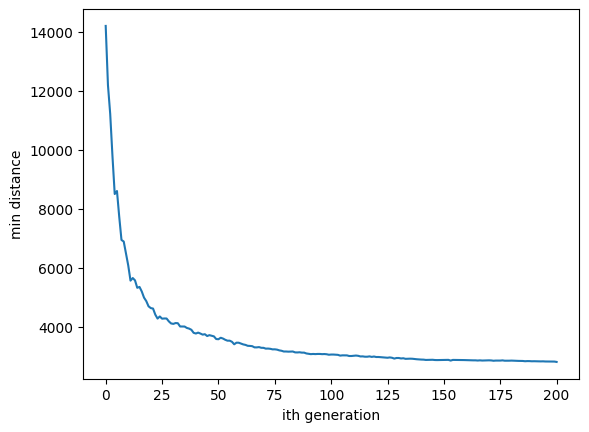

In [167]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")

plt.show()


مشاهده میکنیم که هر چه در نسل های بعدی پیش میرویم، تابع به صورت لگاریتمی، میشود، یعنی مشتق تابع نزولی است و تغییرات بین دو نسل به مرور کمتر می شود.

In [168]:
test_case_file = open("pr1002.txt", "r")
Lines = test_case_file.readlines()
coords = []
for line in Lines:
    city = (list(line.split(' '))[1:])
    coords.append((float(city[0]), float(city[1][:-2])))
print(coords)


[(1150.0, 400.0), (1050.0, 275.0), (1150.0, 225.0), (1250.0, 205.0), (1350.0, 235.0), (1050.0, 155.0), (3350.0, 170.0), (3450.0, 145.0), (3550.0, 160.0), (3950.0, 170.0), (4050.0, 200.0), (4050.0, 215.0), (4250.0, 165.0), (4150.0, 150.0), (4450.0, 145.0), (4400.0, 170.0), (4600.0, 185.0), (4900.0, 155.0), (5100.0, 155.0), (5350.0, 145.0), (4950.0, 170.0), (4850.0, 190.0), (4900.0, 205.0), (5000.0, 215.0), (5100.0, 205.0), (5400.0, 205.0), (5750.0, 200.0), (5900.0, 205.0), (5600.0, 225.0), (5400.0, 230.0), (5250.0, 225.0), (5000.0, 235.0), (5000.0, 255.0), (5050.0, 280.0), (5250.0, 275.0), (5450.0, 275.0), (5400.0, 295.0), (5200.0, 315.0), (5050.0, 310.0), (4950.0, 330.0), (5100.0, 360.0), (5200.0, 365.0), (5350.0, 375.0), (5450.0, 375.0), (5600.0, 375.0), (5600.0, 425.0), (5450.0, 425.0), (5350.0, 415.0), (5050.0, 380.0), (4950.0, 350.0), (4700.0, 350.0), (4400.0, 370.0), (4450.0, 350.0), (4100.0, 350.0), (4150.0, 330.0), (4100.0, 315.0), (4300.0, 330.0), (4500.0, 315.0), (4500.0, 295.

In [169]:
x,y = min_tsp(1500,len(coords),coords,stop_point=16000)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/amir/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_19489/3717972598.py", line 1, in <module>
    x,y = min_tsp(1500,len(coords),coords,stop_point=16000)
  File "/tmp/ipykernel_19489/3850709406.py", line 10, in min_tsp
    tsp.select()
  File "/tmp/ipykernel_19489/1476922648.py", line 148, in select
    new_child = self.crossover(first_parent[1], second_parent[1])
  File "/tmp/ipykernel_19489/1476922648.py", line -1, in crossover
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/amir/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/amir/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1310, in struct

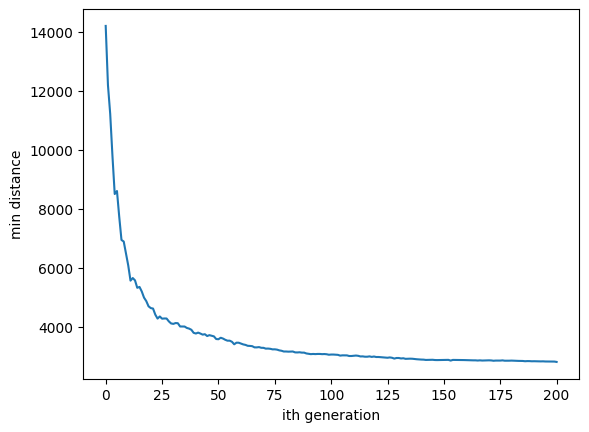

In [170]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")

plt.show()
